#Imports

In [2]:
import pandas as pd

#VIZ

In [3]:
df1 = pd.read_csv("C:/Users/yedde/Downloads/Scoring (1).csv")

In [4]:
df1

,client,recence,date_transaction,frequence,monetaire,score_recence,score_frequence,score_monetaire
0,CLI0,75,2023-09-02,707,493484.53,1,1,1
1,CLI1,76,2023-09-01,778,521542.02,1,3,3
2,CLI10,80,2023-08-28,800,530880.83,2,4,3
3,CLI11,78,2023-08-30,709,501092.25,1,1,2
4,CLI12,88,2023-08-20,638,430463.43,4,1,1
...,...,...,...,...,...,...,...,...
95,CLI95,79,2023-08-29,781,549884.45,2,3,4
96,CLI96,86,2023-08-22,676,452979.55,4,1,1
97,CLI97,82,2023-08-26,787,542339.22,3,4,4
98,CLI98,83,2023-08-25,638,429644.38,4,1,1


In [5]:
df1['RFMScore'] = df1['score_recence'].astype(str) + df1['score_frequence'].astype(str) + df1['score_monetaire'].astype(str)
df1

,client,recence,date_transaction,frequence,monetaire,score_recence,score_frequence,score_monetaire,RFMScore
0,CLI0,75,2023-09-02,707,493484.53,1,1,1,111
1,CLI1,76,2023-09-01,778,521542.02,1,3,3,133
2,CLI10,80,2023-08-28,800,530880.83,2,4,3,243
3,CLI11,78,2023-08-30,709,501092.25,1,1,2,112
4,CLI12,88,2023-08-20,638,430463.43,4,1,1,411
...,...,...,...,...,...,...,...,...,...
95,CLI95,79,2023-08-29,781,549884.45,2,3,4,234
96,CLI96,86,2023-08-22,676,452979.55,4,1,1,411
97,CLI97,82,2023-08-26,787,542339.22,3,4,4,344
98,CLI98,83,2023-08-25,638,429644.38,4,1,1,411


In [6]:
def categorize_customer(row):
    if row['score_recence'] in [2, 3, 4] and row['score_frequence'] == 4 and row['score_monetaire'] == 4:
        return "Champion"
    elif row['score_recence'] == 3 and (row['score_frequence'] in [1, 2, 3, 4]) and row['score_monetaire'] in [3, 4]:
        return "Client le plus fidèle"
    elif row['score_recence'] == 3 and (row['score_frequence'] in [1, 2, 3, 4]) and row['score_monetaire'] in [1, 2]:
        return "Client fidèle"
    elif row['score_recence'] == 4 and (row['score_frequence'] in [1, 2, 3, 4]) and row['score_monetaire'] in [3, 4]:
        return "Client plus récent"
    elif row['score_recence'] == 4 and (row['score_frequence'] in [1, 2, 3, 4]) and row['score_monetaire'] in [1, 2]:
        return "Client récent"
    elif (row['score_recence'] in [2, 3]) and (row['score_frequence'] in [1, 2, 3, 4]) and row['score_monetaire'] in [3, 4]:
        return "Nécessite beaucoup d'attention"
    elif (row['score_recence'] in [2, 3]) and (row['score_frequence'] in [1, 2, 3, 4]) and row['score_monetaire'] in [1, 2]:
        return "Nécessite un peu d'attention"
    elif row['score_recence'] == 1 and (row['score_frequence'] in [1, 2, 3, 4]) and row['score_monetaire'] in [3, 4]:
        return "Client très perdu"
    elif row['score_recence'] == 1 and (row['score_frequence'] in [1, 2, 3, 4]) and row['score_monetaire'] in [1, 2]:
        return "Clients perdus"
    else:
        return "Autre"

# Apply the categorization function to create the new column
df1['customer_category'] = df1.apply(categorize_customer, axis=1)
df1

,client,recence,date_transaction,frequence,monetaire,score_recence,score_frequence,score_monetaire,RFMScore,customer_category
0,CLI0,75,2023-09-02,707,493484.53,1,1,1,111,Clients perdus
1,CLI1,76,2023-09-01,778,521542.02,1,3,3,133,Client très perdu
2,CLI10,80,2023-08-28,800,530880.83,2,4,3,243,Nécessite beaucoup d'attention
3,CLI11,78,2023-08-30,709,501092.25,1,1,2,112,Clients perdus
4,CLI12,88,2023-08-20,638,430463.43,4,1,1,411,Client récent
...,...,...,...,...,...,...,...,...,...,...
95,CLI95,79,2023-08-29,781,549884.45,2,3,4,234,Nécessite beaucoup d'attention
96,CLI96,86,2023-08-22,676,452979.55,4,1,1,411,Client récent
97,CLI97,82,2023-08-26,787,542339.22,3,4,4,344,Champion
98,CLI98,83,2023-08-25,638,429644.38,4,1,1,411,Client récent


In [7]:
df1.to_csv("Segmentation appliquée à la Base.csv")

In [8]:
import pandas as pd

# Assuming your DataFrame is named 'df1'
# If it's not, replace 'df1' with the actual name of your DataFrame

# Create the new column 'rfm_label'
df1['rfm_label'] = df1['score_recence'] + df1['score_frequence'] + df1['score_monetaire']

df1

,client,recence,date_transaction,frequence,monetaire,score_recence,score_frequence,score_monetaire,RFMScore,customer_category,rfm_label
0,CLI0,75,2023-09-02,707,493484.53,1,1,1,111,Clients perdus,3
1,CLI1,76,2023-09-01,778,521542.02,1,3,3,133,Client très perdu,7
2,CLI10,80,2023-08-28,800,530880.83,2,4,3,243,Nécessite beaucoup d'attention,9
3,CLI11,78,2023-08-30,709,501092.25,1,1,2,112,Clients perdus,4
4,CLI12,88,2023-08-20,638,430463.43,4,1,1,411,Client récent,6
...,...,...,...,...,...,...,...,...,...,...,...
95,CLI95,79,2023-08-29,781,549884.45,2,3,4,234,Nécessite beaucoup d'attention,9
96,CLI96,86,2023-08-22,676,452979.55,4,1,1,411,Client récent,6
97,CLI97,82,2023-08-26,787,542339.22,3,4,4,344,Champion,11
98,CLI98,83,2023-08-25,638,429644.38,4,1,1,411,Client récent,6


In [9]:
# Group by 'customer_category' and calculate average and size
grouped_df = df1.groupby('customer_category')['rfm_label'].agg(['mean', 'size']).reset_index()

# Rename the columns for clarity
grouped_df.columns = ['customer_category', 'AVG_RFM_Label', 'Size_RFM_Label']

grouped_df

,customer_category,AVG_RFM_Label,Size_RFM_Label
0,Champion,10.785714,14
1,Client fidèle,6.166667,12
2,Client le plus fidèle,8.750000,4
3,Client plus récent,10.333333,6
4,Client récent,6.833333,12
5,Client très perdu,7.625000,16
6,Clients perdus,4.000000,18
7,Nécessite beaucoup d'attention,8.300000,10
8,Nécessite un peu d'attention,5.500000,8


c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y

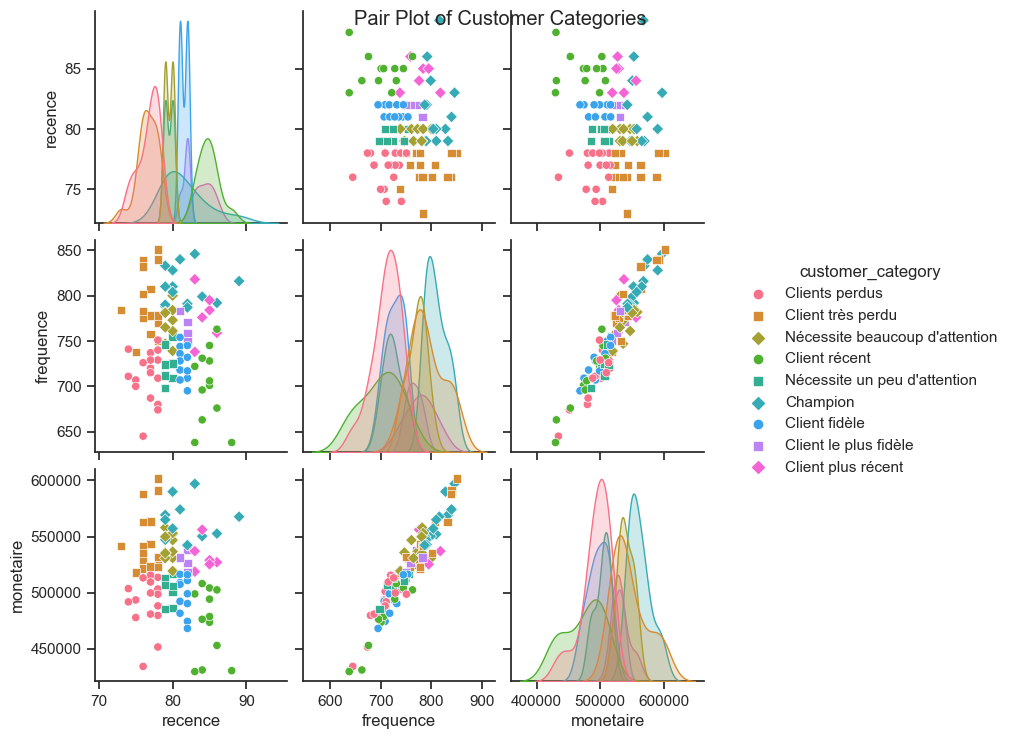

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Set the style of seaborn
sns.set(style="ticks", color_codes=True)

# Select relevant columns for the pair plot
columns_for_pair_plot = ['recence', 'frequence', 'monetaire', 'customer_category']

# Create the pair plot
pair_plot = sns.pairplot(df1[columns_for_pair_plot], hue='customer_category', palette='husl', markers=["o", "s", "D"])

# Add legend outside the plot and adjust its position
pair_plot.fig.subplots_adjust(right=0.7)  # Adjust this value accordingly

# Add a title to the plot
pair_plot.fig.suptitle("Pair Plot of Customer Categories")

# Show the plot
plt.show()


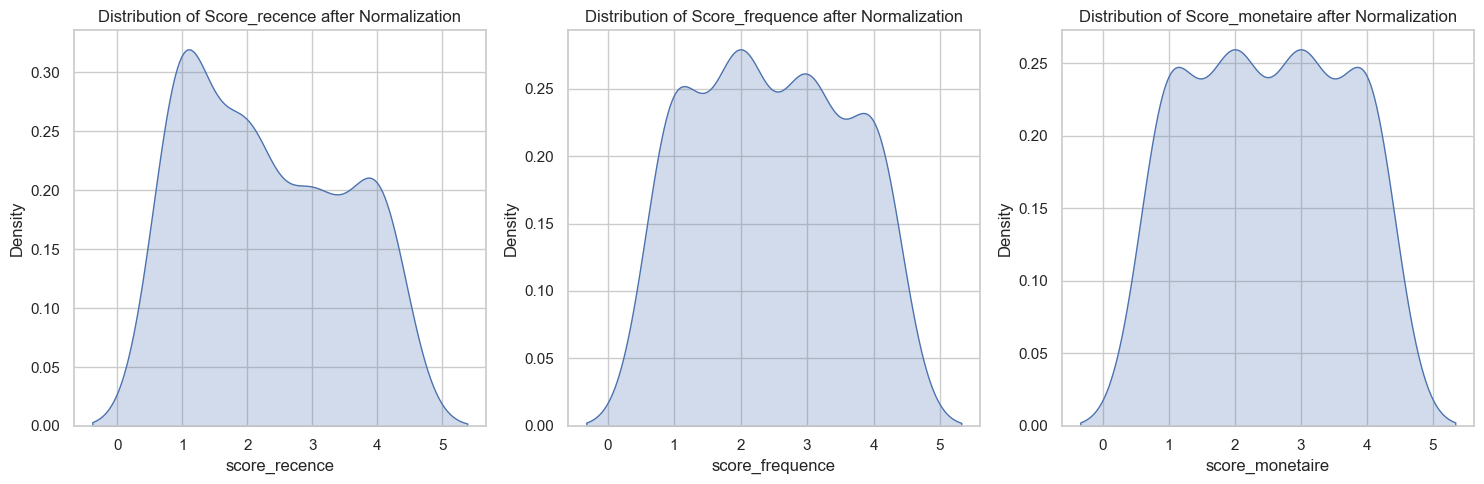

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Select relevant columns for the density plots
columns_for_density_plot = ['score_recence', 'score_frequence', 'score_monetaire']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create density plots for each variable
for i, column in enumerate(columns_for_density_plot):
    sns.kdeplot(df1[column], ax=axes[i], fill=True, common_norm=False)
    axes[i].set_title(f'Distribution of {column.capitalize()} after Normalization')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


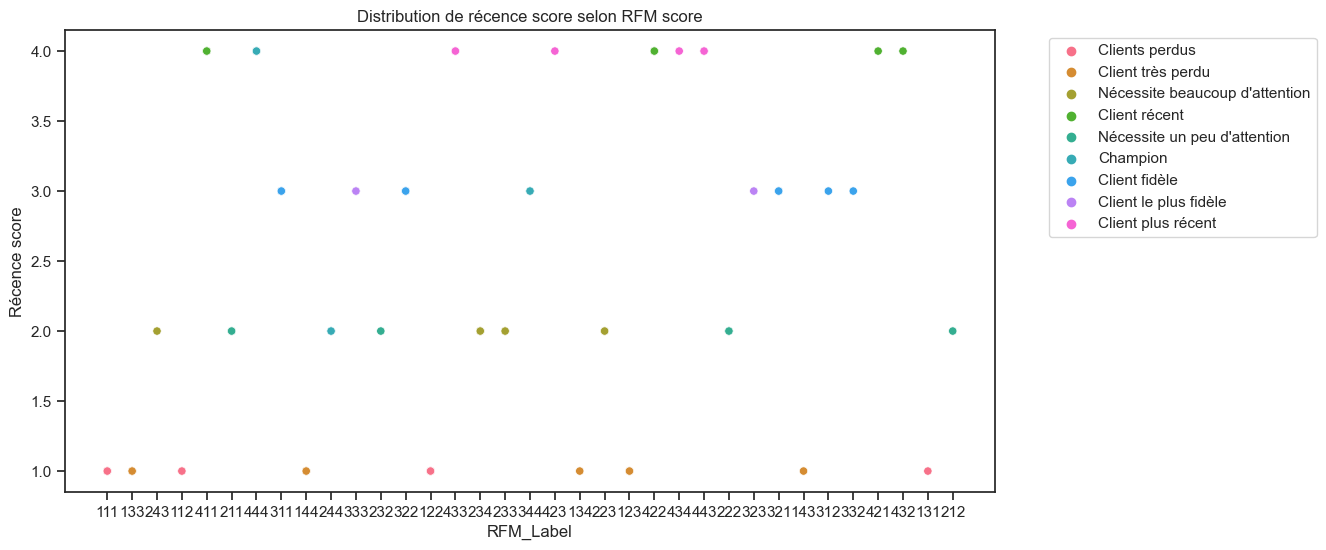

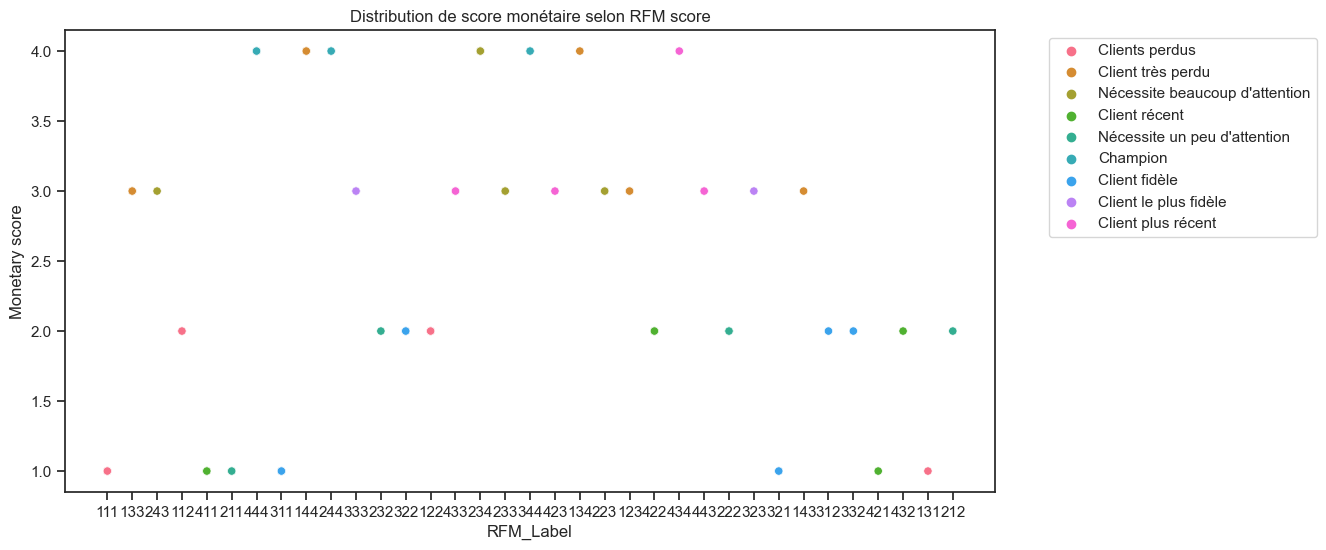

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df1

# Set the style of seaborn
sns.set(style="ticks", color_codes=True)

# Select relevant columns for the scatter plots
columns_for_scatter_plot = ['RFMScore', 'score_recence', 'score_monetaire', 'customer_category']

# Create the scatter plot for recency score
plt.figure(figsize=(12, 6))
scatter_plot_recence = sns.scatterplot(data=df1[columns_for_scatter_plot], x='RFMScore', y='score_recence', hue='customer_category', palette='husl', markers=["o", "s", "D"])
plt.title("Distribution de récence score selon RFM score")
plt.xlabel("RFM_Label")
plt.ylabel("Récence score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Create the scatter plot for monetary score
plt.figure(figsize=(12, 6))
scatter_plot_monetaire = sns.scatterplot(data=df1[columns_for_scatter_plot], x='RFMScore', y='score_monetaire', hue='customer_category', palette='husl', markers=["o", "s", "D"])
plt.title("Distribution de score monétaire selon RFM score")
plt.xlabel("RFM_Label")
plt.ylabel("Monetary score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\yedde\AppData\Local\Temp\ipykernel_11164\2185425520.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


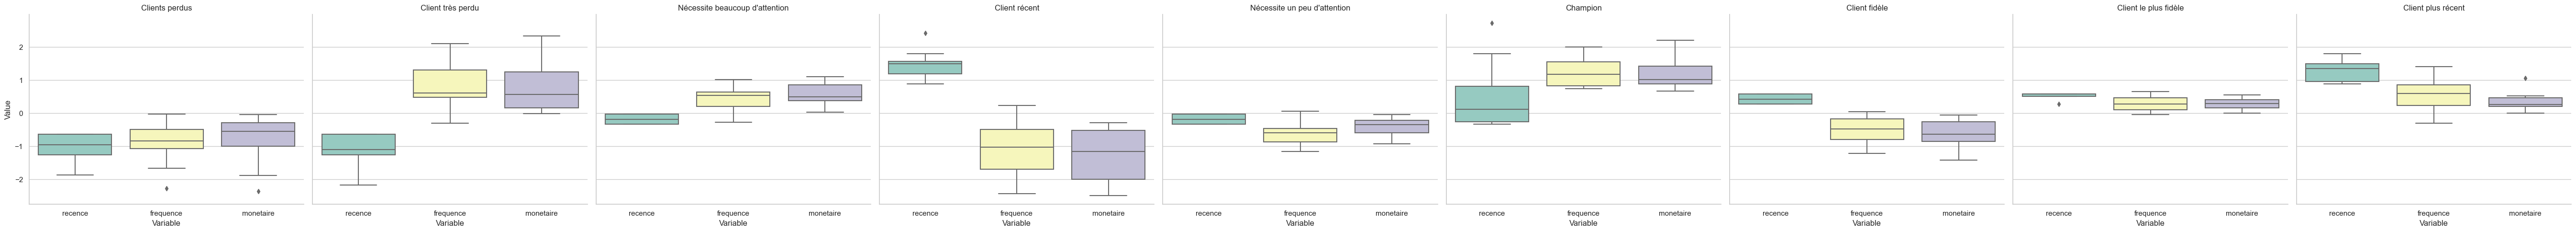

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df1'
# If it's not, replace 'df1' with the actual name of your DataFrame

# Selecting relevant columns for clustering
X = df1[['recence', 'frequence', 'monetaire']]
variables = ['recence', 'frequence', 'monetaire']

# Scaling the data
scaler = StandardScaler()
df1_scaled = df1.copy()
df1_scaled[variables] = scaler.fit_transform(df1[variables])

# Melt the scaled DataFrame to create a long-form DataFrame suitable for boxplot
df1_melted = pd.melt(df1_scaled, id_vars=['customer_category'], value_vars=variables, var_name='Variable', value_name='Value')

# Set the style for better visualization
sns.set(style="whitegrid")

# Create separate boxplots for each customer category
g = sns.catplot(x='Variable', y='Value', col='customer_category', data=df1_melted, kind='box', height=5, aspect=1.2, palette="Set3")

# Set titles for each subplot
g.set_titles("{col_name}")
plt.tight_layout()

# Show the plot
plt.show()



#CLustering

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
selected_columns = ['score_recence', 'score_frequence', 'score_monetaire']
selected_data = df1[selected_columns]

# Calculate skewness for each column
skewness = selected_data.skew()

# Print the skewness for each variable
for column, skew in zip(selected_columns, skewness):
    print(f"Skewness for {column}: {skew}")


Skewness for score_recence: 0.2873343314416643
Skewness for score_frequence: 0.05737906047176019
Skewness for score_monetaire: 0.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Assuming your DataFrame is named df1
selected_columns = ['recence', 'frequence', 'monetaire']
selected_data = df1[selected_columns]

# Calculate skewness for each column
original_skewness = selected_data.skew()

# Normalize with PowerTransformer
# power_transformer = PowerTransformer()
# normalized_data = power_transformer.fit_transform(selected_data)

# Standardize with StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Convert the normalized and scaled data back to a DataFrame
normalized_df1 = pd.DataFrame(scaled_data, columns=selected_columns)

# Calculate skewness for each column after normalization and scaling
transformed_skewness = normalized_df1.skew()

# Print the results
print("Original Skewness:")
for column, skew in zip(selected_columns, original_skewness):
    print(f"Skewness for {column}: {skew}")

print("\nSkewness after Power Transformation and Standard Scaling:")
for column, skew in zip(selected_columns, transformed_skewness):
    print(f"Skewness for {column}: {skew}")


Original Skewness:
Skewness for recence: 0.3266220066300683
Skewness for frequence: -0.06794956012364028
Skewness for monetaire: -0.16367165154612154

Skewness after Power Transformation and Standard Scaling:
Skewness for recence: 0.3266220066300714
Skewness for frequence: -0.06794956012364246
Skewness for monetaire: -0.16367165154612032


In [ ]:
df1 =normalized_df1

In [ ]:
df1

,recence,frequence,monetaire
0,-1.554468,-0.955289,-0.698757
1,-1.249072,0.554965,0.088101
2,-0.027486,1.022932,0.350003
3,-0.638279,-0.912747,-0.485402
4,2.415687,-2.423002,-2.466150
...,...,...,...
95,-0.332882,0.618779,0.882949
96,1.804894,-1.614696,-1.834697
97,0.583307,0.746406,0.671347
98,0.888704,-2.423002,-2.489120


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data in X (feature matrix)


# Set the range of k values
k_values = range(2, 11)

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate over k values
for k in k_values:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)

    # Predict the cluster labels
    labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df1, labels)
    silhouette_scores.append(silhouette_avg)

    print(f"For k={k}, silhouette score: {silhouette_avg}")



c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k=2, silhouette score: 0.35894739601455616
For k=3, silhouette score: 0.32183727860286093
For k=4, silhouette score: 0.33797125257430854
For k=5, silhouette score: 0.3166224911675869


c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

For k=6, silhouette score: 0.34074016230530396
For k=7, silhouette score: 0.33554854427764425
For k=8, silhouette score: 0.31830320447909505
For k=9, silhouette score: 0.32154145322774097


c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

For k=10, silhouette score: 0.3142119964149858


In [ ]:
print("For k=2, silhouette  score: 0.3340896082369881")
print("For k=3, silhouette  score: 0.32183727860286093")
print("For k=4, silhouette  score: 0.35894739601455616")
print("For k=5, silhouette  score: 0.3159815115099358")
print("For k=6, silhouette  score: 0.34552401111230824")
print("For k=7, silhouette  score: 0.3397742912380986")
print("For k=8, silhouette  score: 0.31626595063384716")
print("For k=9, silhouette  score: 0.3207323481693611")
print("For k=10, silhouette  score: 0.32687526558261404")

For k=2, silhouette  score: 0.3340896082369881
For k=3, silhouette  score: 0.32183727860286093
For k=4, silhouette  score: 0.35894739601455616
For k=5, silhouette  score: 0.3159815115099358
For k=6, silhouette  score: 0.34552401111230824
For k=7, silhouette  score: 0.3397742912380986
For k=8, silhouette  score: 0.31626595063384716
For k=9, silhouette  score: 0.3207323481693611
For k=10, silhouette  score: 0.32687526558261404


c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

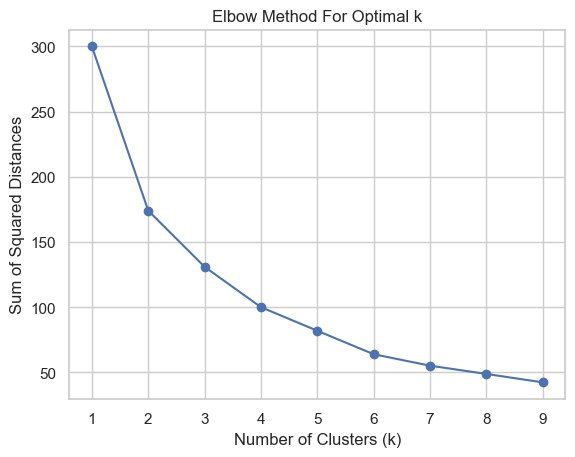

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Selecting relevant columns for clustering
X = df1[['recence', 'frequence', 'monetaire']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()


####Using ELBOW to Validate the number of choice from silhoutte score, we can see that K=4 is the best number of clusters


c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


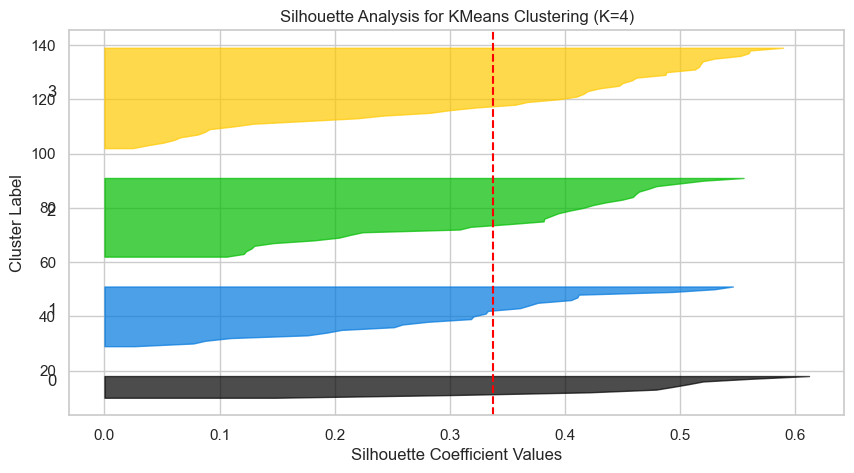

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Selecting relevant columns for clustering
X = df1[['recence', 'frequence', 'monetaire']]
# Determine the optimal number of clusters using the elbow method (assuming K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Calculate silhouette scores for each data point
silhouette_values = silhouette_samples(X, labels)

# Calculate the average silhouette score
average_silhouette_score = silhouette_score(X, labels)

# Create a Silhouette Analysis plot
fig, ax = plt.subplots(figsize=(10, 5))

y_lower = 10  # Initial value for the lower y-axis

# Iterate over clusters
for i in range(optimal_k):
    # Aggregate silhouette scores for samples in the current cluster
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()

    # Calculate the upper y-axis for the silhouette plot
    y_upper = y_lower + len(cluster_silhouette_values)

    # Fill the area for each cluster with a different color
    color = plt.cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_values), str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

# Add a red dashed line representing the average silhouette score
ax.axvline(x=average_silhouette_score, color="red", linestyle="--")

# Labeling and styling
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.set_title("Silhouette Analysis for KMeans Clustering (K=4)")

plt.show()


c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


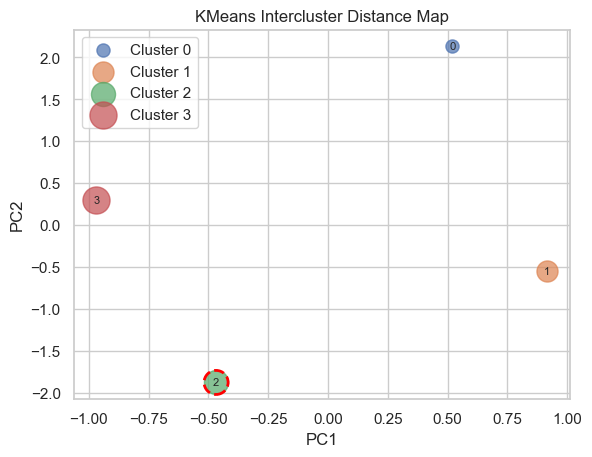

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

# Assuming your DataFrame is named 'df1'
# If it's not, replace 'df1' with the actual name of your DataFrame

# Selecting relevant columns for clustering
X = df1[['recence', 'frequence', 'monetaire']]

# Standardize the data

# Fit KMeans clustering with the optimal number of clusters (replace with your optimal K value)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Calculate pairwise distances between cluster centers
cluster_distances = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')

# Apply Multidimensional Scaling (MDS) to reduce the distances to 2D space
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
cluster_positions = mds.fit_transform(cluster_distances)

# Plot the KMeans Intercluster Distance Map
fig, ax = plt.subplots()

# Plot circles for each cluster with their labels
for i, (x, y) in enumerate(cluster_positions):
    circle_size = len(cluster_labels[cluster_labels == i]) * 10  # Adjust size based on cluster size
    ax.scatter(x, y, s=circle_size, label=f'Cluster {i}', alpha=0.7)

    # Annotate the circles with cluster labels
    ax.text(x, y, str(i), fontsize=8, ha='center', va='center')

# Plot a dashed line around the outlier cluster (replace with your specific cluster)
outlier_cluster = 2
outlier_x, outlier_y = cluster_positions[outlier_cluster]
circle_size = len(cluster_labels[cluster_labels == outlier_cluster]) * 10
ax.scatter(outlier_x, outlier_y, s=circle_size, facecolors='none', edgecolors='red', linestyle='dashed', linewidth=2)

# Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('KMeans Intercluster Distance Map')

# Add legend
ax.legend()

plt.show()


c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yedde\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


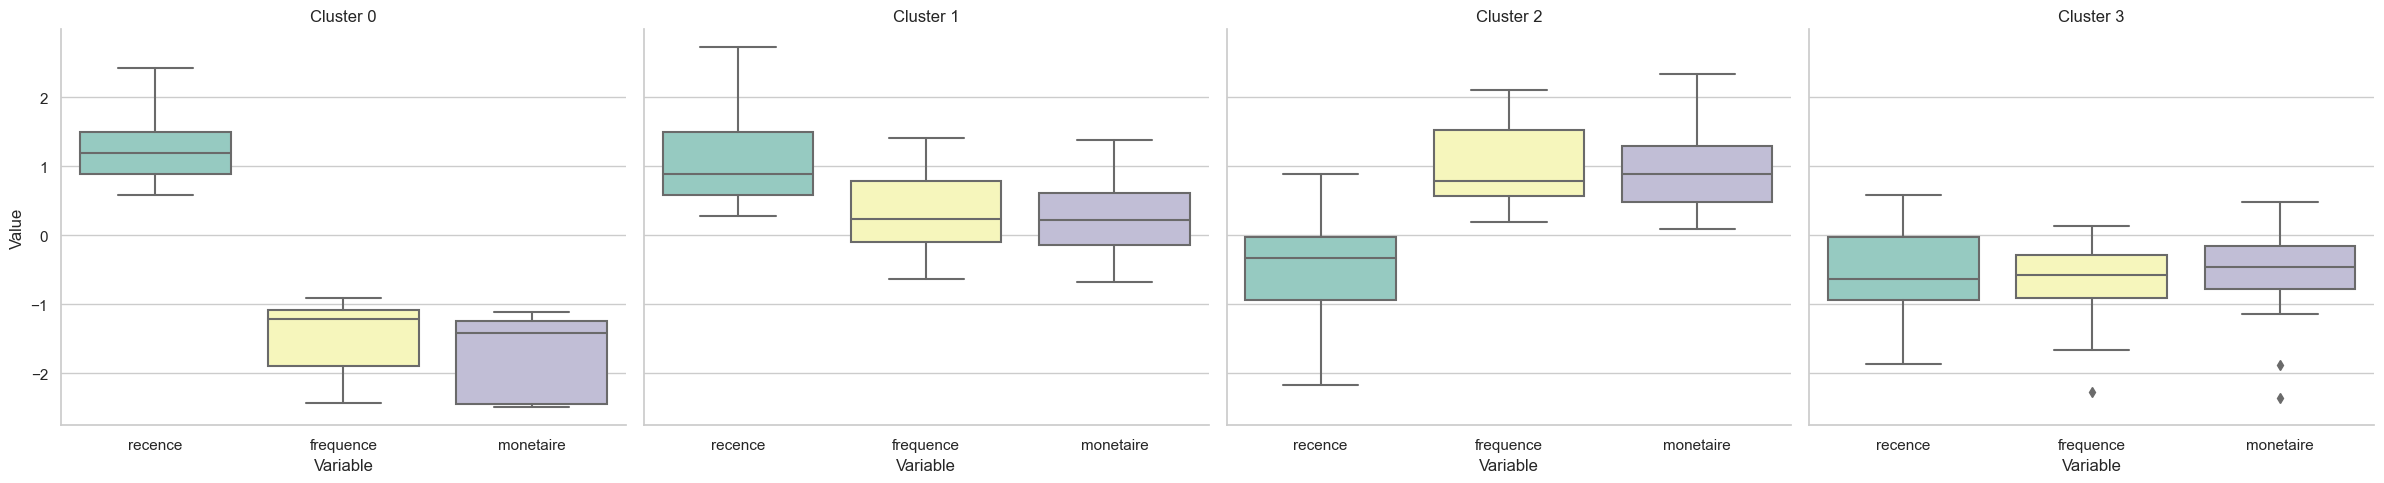

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df1'
# If it's not, replace 'df1' with the actual name of your DataFrame

# Selecting relevant columns for clustering
X = df1[['recence', 'frequence', 'monetaire']]

# Standardize the data

# Perform KMeans clustering
optimal_k = 4  # Replace with your optimal K value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df1['ClusterID'] = kmeans.fit_predict(X)

# Replace 'variable1', 'variable2', 'variable3' with the actual variable names in your dataset
variables = ['recence', 'frequence', 'monetaire']

# Melt the DataFrame to create a long-form DataFrame suitable for boxplot
df1_melted = pd.melt(df1, id_vars=['ClusterID'], value_vars=variables, var_name='Variable', value_name='Value')

# Set the style for better visualization
sns.set(style="whitegrid")

# Create separate boxplots for each cluster
g = sns.catplot(x='Variable', y='Value', col='ClusterID', data=df1_melted, kind='box', height=5, aspect=1.2, palette="Set3")

# Set titles for each subplot
g.set_titles("Cluster {col_name}")

# Show the plot
plt.show()


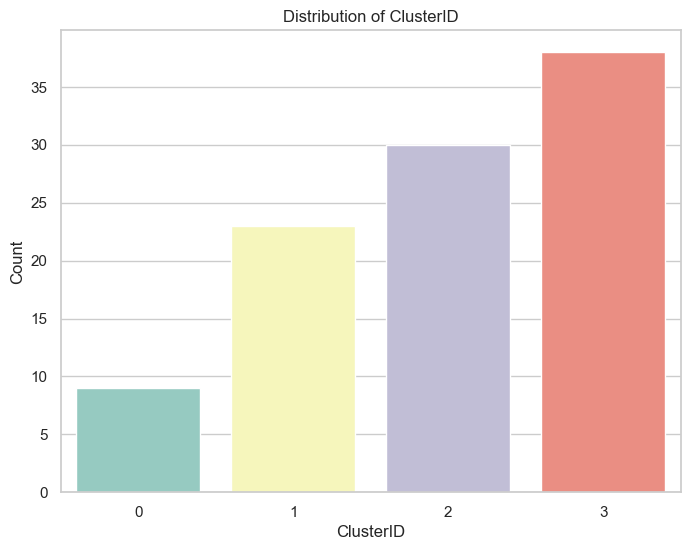

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df1'
# If it's not, replace 'df1' with the actual name of your DataFrame

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a bar plot for ClusterID distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='ClusterID', data=df1, palette="Set3")

# Add title and labels
plt.title('Distribution of ClusterID')
plt.xlabel('ClusterID')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
df1

,recence,frequence,monetaire,ClusterID
0,-1.554468,-0.955289,-0.698757,3
1,-1.249072,0.554965,0.088101,2
2,-0.027486,1.022932,0.350003,2
3,-0.638279,-0.912747,-0.485402,3
4,2.415687,-2.423002,-2.466150,0
...,...,...,...,...
95,-0.332882,0.618779,0.882949,2
96,1.804894,-1.614696,-1.834697,0
97,0.583307,0.746406,0.671347,1
98,0.888704,-2.423002,-2.489120,0


In [ ]:
cluster_mapping = {
    0: 'Clients fidèle',  # Cluster 0 is assigned the worst clients
    1: "Clients récent",
    2: 'Client perdus',
    3: "Client nécessite plus d'attention",
}

# Create a new column 'customer_category' based on ClusterID
df1['customer_category'] = df1['ClusterID'].map(cluster_mapping)

# Calculate AVG_RFM_Label and Size_RFM_Label based on your data
# You can customize this part based on your actual data
df1

,recence,frequence,monetaire,ClusterID,customer_category
0,-1.554468,-0.955289,-0.698757,3,Client nécessite plus d'attention
1,-1.249072,0.554965,0.088101,2,Client perdus
2,-0.027486,1.022932,0.350003,2,Client perdus
3,-0.638279,-0.912747,-0.485402,3,Client nécessite plus d'attention
4,2.415687,-2.423002,-2.466150,0,Clients fidèle
...,...,...,...,...,...
95,-0.332882,0.618779,0.882949,2,Client perdus
96,1.804894,-1.614696,-1.834697,0,Clients fidèle
97,0.583307,0.746406,0.671347,1,Clients récent
98,0.888704,-2.423002,-2.489120,0,Clients fidèle


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df1'
# If it's not, replace 'df1' with the actual name of your DataFrame

# Selecting features and labels
X = df1[['recence', 'frequence', 'monetaire']]
y = df1['ClusterID']

# Standardize the features


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = KNeighborsClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 1.0
Confusion Matrix:
 [[1 0 0 0]
 [0 5 0 0]
 [0 0 7 0]
 [0 0 0 7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#Recommendation

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import pandas as pd

# Exemple de données transactionnelles
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

# Convertir les données en format adapté à l'algorithme FP-Growth
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Utiliser l'algorithme FP-Growth
frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)

print(frequent_itemsets)


    support                     itemsets
0       1.0               (Kidney Beans)
1       0.8                       (Eggs)
2       0.6                     (Yogurt)
3       0.6                      (Onion)
4       0.6                       (Milk)
5       0.8         (Kidney Beans, Eggs)
6       0.6       (Yogurt, Kidney Beans)
7       0.6                (Onion, Eggs)
8       0.6        (Onion, Kidney Beans)
9       0.6  (Onion, Kidney Beans, Eggs)
10      0.6         (Kidney Beans, Milk)


In [ ]:
# from surprise import Dataset
# from surprise import Reader
# from surprise.model_selection import train_test_split
# from surprise import KNNBasic
# from surprise import accuracy

# # Charger les données de l'ensemble de données MovieLens (vous pouvez remplacer cela par votre propre ensemble de données)
# data = df1

# # Diviser les données en ensembles d'apprentissage et de test
# trainset, testset = train_test_split(data, test_size=0.25)

# # Utiliser l'algorithme de Filtrage Collaboratif basé sur les utilisateurs (KNN)
# sim_options = {'name': 'cosine', 'user_based': True}
# algo = KNNBasic(sim_options=sim_options)

# # Entraîner l'algorithme sur l'ensemble d'apprentissage
# algo.fit(trainset)

# # Prédire les évaluations pour les éléments dans l'ensemble de test
# predictions = algo.test(testset)

# # Mesurer la précision des prédictions
# accuracy.rmse(predictions)


In [ ]:
df1

,recence,frequence,monetaire,ClusterID,customer_category
0,-1.554468,-0.955289,-0.698757,3,Client nécessite plus d'attention
1,-1.249072,0.554965,0.088101,2,Client perdus
2,-0.027486,1.022932,0.350003,2,Client perdus
3,-0.638279,-0.912747,-0.485402,3,Client nécessite plus d'attention
4,2.415687,-2.423002,-2.466150,0,Clients fidèle
...,...,...,...,...,...
95,-0.332882,0.618779,0.882949,2,Client perdus
96,1.804894,-1.614696,-1.834697,0,Clients fidèle
97,0.583307,0.746406,0.671347,1,Clients récent
98,0.888704,-2.423002,-2.489120,0,Clients fidèle


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



data = pd.read_csv("C:/Users/yedde/Downloads/transactionstest288.csv")
# data
# Création d'un DataFrame
df = pd.DataFrame(data)

# Création de la matrice client-article
matrice = pd.pivot_table(df, index='client', columns='fk_article', aggfunc=len, fill_value=0)

# Affichage de la matrice
print(matrice)

# # Visualisation avec Seaborn
# sns.heatmap(matrice, annot=True, cmap="YlGnBu")
# plt.show()


                cattc                                                         \
fk_article 028AR0DXYI 06WGPW9YOV 0CCM070AMR 0HZIW28HG0 0OAZ207UDB 0W18PX68ZB   
client                                                                         
CLI0               11         10          6          7         11         17   
CLI1               10          9         15         13         12         10   
CLI10              15         18         13         13         14         12   
CLI11              15         14         15         11          9         14   
CLI12              15         13         11         16          9         12   
...               ...        ...        ...        ...        ...        ...   
CLI95              14         13         11         14         14          4   
CLI96               9          8         13         11         12         11   
CLI97              11         10         12         12          8         10   
CLI98              12         12        

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un DataFrame
df = pd.DataFrame(data)

# Fonction personnalisée pour l'agrégation
# Elle retourne 1 si un produit existe, sinon 0
def exist_or_not(x):
    return 1 if len(x) > 0 else 0

# Création de la matrice client-article
matrice = pd.pivot_table(df, index='client', columns='fk_article', aggfunc=exist_or_not, fill_value=0)

# Affichage de la matrice
print(matrice)

# # Visualisation avec Seaborn
# sns.heatmap(matrice, annot=True, cmap="YlGnBu")
# plt.show()


                cattc                                                         \
fk_article 028AR0DXYI 06WGPW9YOV 0CCM070AMR 0HZIW28HG0 0OAZ207UDB 0W18PX68ZB   
client                                                                         
CLI0                1          1          1          1          1          1   
CLI1                1          1          1          1          1          1   
CLI10               1          1          1          1          1          1   
CLI11               1          1          1          1          1          1   
CLI12               1          1          1          1          1          1   
...               ...        ...        ...        ...        ...        ...   
CLI95               1          1          1          1          1          1   
CLI96               1          1          1          1          1          1   
CLI97               1          1          1          1          1          1   
CLI98               1          1        

In [ ]:
import pandas as pd




# Grouper les données par 'client' et 'id_ticket', et aggréger 'fk_article' dans une liste
grouped_df = data.groupby(['client', 'id_ticket'])['fk_article'].apply(list).reset_index()

# Renommer les colonnes pour correspondre à l'exemple de l'utilisateur
grouped_df.columns = ['CLIENT', 'ID_TICKET', 'Valeur ajusté FK_article']

# Affichage du résultat
print(grouped_df)


      CLIENT     ID_TICKET                           Valeur ajusté FK_article
0       CLI0  TICKET001086   [XT7IYYLR4B, JC7C5TJWC7, QCNTUDFW70, 7VON6J1ZC9]
1       CLI0  TICKET001200   [FVFS9OVHJ0, 6KJMKS0AL2, SXPWNMI0H2, RRGXODOR56]
2       CLI0  TICKET002600  [TTLXAJ24FU, T7CPOCPX88, C5J3ZL4FL3, 8SJXNEM7T...
3       CLI0  TICKET003230  [7B5GWUW59Z, 1F9E0P1VUG, 28CT50RRS2, PPLWA73L8...
4       CLI0  TICKET003331  [FQ7YGLUUGK, VYX7JOR5L8, RD91K8S03F, UOXOPPQDF...
...      ...           ...                                                ...
74491  CLI99  TICKET994495  [SRQV9Q99T8, 30I7QYYWJI, EIFIMSZV1W, VJ3PHX9GI...
74492  CLI99  TICKET994822   [3OWNDGZAK1, 1AVCGLBZBE, SIH4IQDIVA, RW5TMMS613]
74493  CLI99  TICKET994907  [KN2274M6JZ, J43Z4HWHNE, L6ZZDISWD4, XSC7HK1RQ...
74494  CLI99  TICKET996990   [7VON6J1ZC9, Z444L2DKC0, 0OAZ207UDB, 5NNDPEG70O]
74495  CLI99  TICKET998470   [3JXU5BA60U, 30I7QYYWJI, 1WKRYGOPJX, NWMN522XQZ]

[74496 rows x 3 columns]


# Fp-Grouth


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules


# Extract the 'Valeur ajusté FK_article' column for FP-Growth
transactions = grouped_df['Valeur ajusté FK_article'].tolist()

# Encode the transactions using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

min_support = 0.0001

# Apply FP-Growth to find frequent itemsets with a given minimum support
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

if frequent_itemsets.empty:
    raise ValueError(f"No frequent itemsets found with min_support {min_support}")

min_confidence = 0.0001

# Generate association rules from the frequent itemsets with a given minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Transform the antecedents and consequents into sorted lists
rules['antecedents'] = rules['antecedents'].apply(lambda x: sorted(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: sorted(list(x)))

if rules.empty:
    raise ValueError(f"No association rules found with min_confidence {min_confidence}")

# Create the final DataFrame with the required structure
final_df = rules[['antecedents', 'consequents', 'confidence']]
final_df.columns = ['basket', 'next_product', 'proba']

# Sort by 'proba' and reset the index
final_df = final_df.sort_values(by='proba', ascending=False).reset_index(drop=True)

# Display the final DataFrame
print(final_df)


              basket  next_product     proba
0       [1AVCGLBZBE]  [VC3XMIHJFR]  0.030755
1       [G9MMWW241R]  [0W18PX68ZB]  0.030009
2       [MMVY08CLXR]  [9HHH3NNWGJ]  0.029511
3       [9HHH3NNWGJ]  [MMVY08CLXR]  0.029461
4       [SCGQQQ97GL]  [CQDEH2GBFM]  0.029281
...              ...           ...       ...
120577  [XLU84J9UQD]  [6K5GWDSPQU]  0.006462
120578  [XLU84J9UQD]  [JL3DP4JIEY]  0.006462
120579  [DTLM88CFE9]  [O0GSDX06RW]  0.006457
120580  [DTLM88CFE9]  [028AR0DXYI]  0.006457
120581  [N9DMVPWRXM]  [4F8WDJLLCD]  0.006441

[120582 rows x 3 columns]


In [ ]:
import pandas as pd

# Assuming you have your 'grouped_df' which contains clients and their purchases
# and 'final_df' which contains your association rules

# Convert string representations of lists into actual lists (if necessary)
def parse_list(x):
    if isinstance(x, str):
        return eval(x)
    return x

grouped_df['Valeur ajusté FK_article'] = grouped_df['Valeur ajusté FK_article'].apply(parse_list)

# Function to generate recommendations for a single client
def recommend_for_client(purchases, rules):
    recommendations = []
    for purchase_set in purchases:
        # Find all rules where the purchase set is a subset of the antecedents
        applicable_rules = rules[rules['basket'].apply(lambda x: set(x).issubset(purchase_set))]
        # Get the most probable recommendation (if any)
        if not applicable_rules.empty:
            top_rule = applicable_rules.iloc[0]
            recommendations.append({'Recommended Product': top_rule['next_product'],
                                    'Probability': top_rule['proba']})
        else:
            recommendations.append({'Recommended Product': None, 'Probability': 0})
    return recommendations

# Apply the recommendation function to each client
grouped_df['Recommendations'] = grouped_df['Valeur ajusté FK_article'].apply(lambda x: recommend_for_client([x], final_df))

# To align with your displayed DataFrame, extract the recommended product and probability
grouped_df['Recommended Product'] = grouped_df['Recommendations'].apply(lambda x: x[0]['Recommended Product'] if x else None)
grouped_df['Probability'] = grouped_df['Recommendations'].apply(lambda x: x[0]['Probability'] if x else 0)

# Drop the temporary Recommendations column
grouped_df.drop('Recommendations', axis=1, inplace=True)

# Display the resulting DataFrame
print(grouped_df[['CLIENT', 'Valeur ajusté FK_article', 'Recommended Product', 'Probability']])
